In [1]:
import analogy_pipeline as ap
import utils
import plotly.graph_objects as go
from plotly.subplots import make_subplots

0:03:52
0:00:00


In [2]:
big_g = utils.inputs_load('Utilities/Relatedness Data/relatedness_data__onlypreflab2021-10-08 16:12:17.177422')
embs = list(big_g.keys())
ks = list(big_g[embs[0]].keys())
seeds = list(big_g[embs[0]][ks[0]].keys())

0:00:00


In [18]:
embs_ = list()
for emb in embs:
    a = emb.replace('-w2v', '')
    b = a.split('_', 1)
    if 'wikipedia' in b[0]:
        b[0] = 'wiki-PubMed-PMC'
    elif 'Google' in b[0]:
        b[0] = 'GoogleNews'
    embs_.append(b[0])
    
seed = seeds[2] # seed_union
k = 5
# https://developer.mozilla.org/en-US/docs/Web/CSS/color_value
colors = ['lightgreen', 'lightcoral', 'darkslateblue',   'purple']
parallel_colors = ['seagreen', 'darksalmon', 'royalblue', 'mediumpurple']


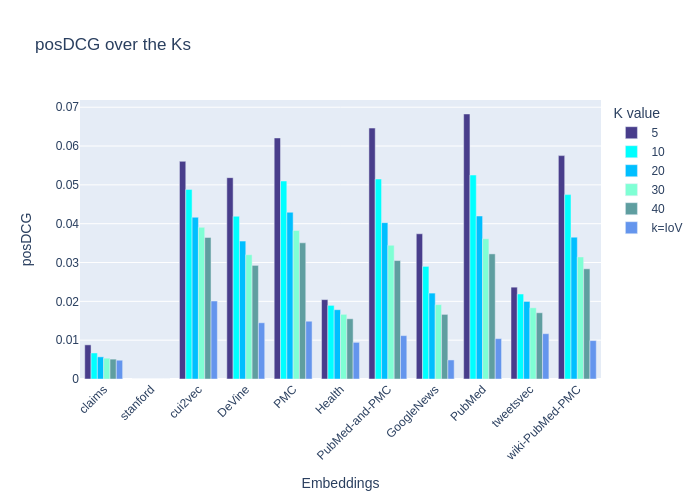

In [4]:
seed = seeds[2]# seed_union
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb][5][seed][0] for emb in embs],
    name='5',
    marker_color='darkslateblue'
))
fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb][10][seed][0] for emb in embs],
    name='10',
    marker_color= 'aqua'
))
fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb][20][seed][0] for emb in embs],
    name='20',
    marker_color= 'deepskyblue'
))
fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb][30][seed][0] for emb in embs],
    name='30',
    marker_color= 'aquamarine'
))
fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb][40][seed][0] for emb in embs],
    name='40',
    marker_color= 'cadetblue'
))
fig.add_trace(go.Bar(
    x=tmp,
    y=[big_g[emb]['max_k'][seed][0] for emb in embs],
    name='k=IoV',
    marker_color= 'cornflowerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG over the Ks',
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG', 
                  barmode='group',
                  legend_title = 'K value',
                  xaxis_tickangle=-45)
#fig.write_image("fig1.png")
fig.show(renderer="png")

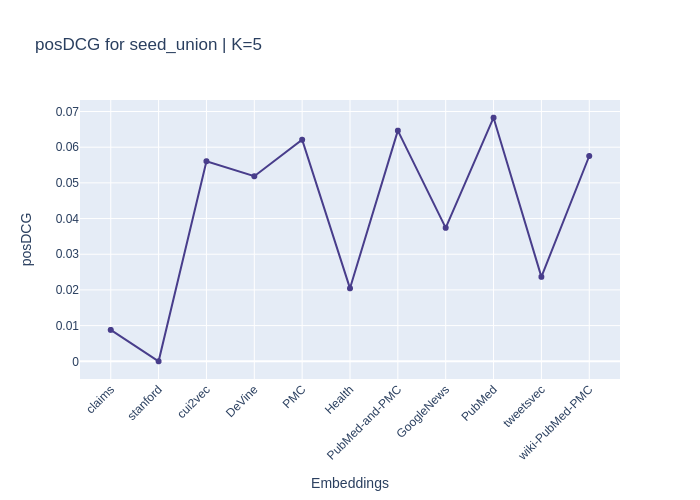

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=tmp,
    y=[big_g[emb][k][seed][0] for emb in embs],
    name='5',
    marker_color='darkslateblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG for ' + seed + ' | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG', 
                  xaxis_tickangle=-45)
fig.show(renderer="png")

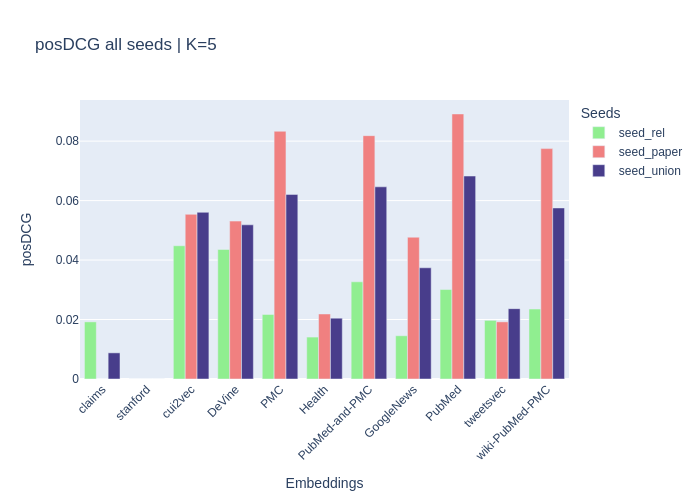

In [6]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Bar(
        x=tmp,
        y=[big_g[emb][k][seed][0] for emb in embs],
        name= seed,
        marker_color=colors[i]
        ))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")

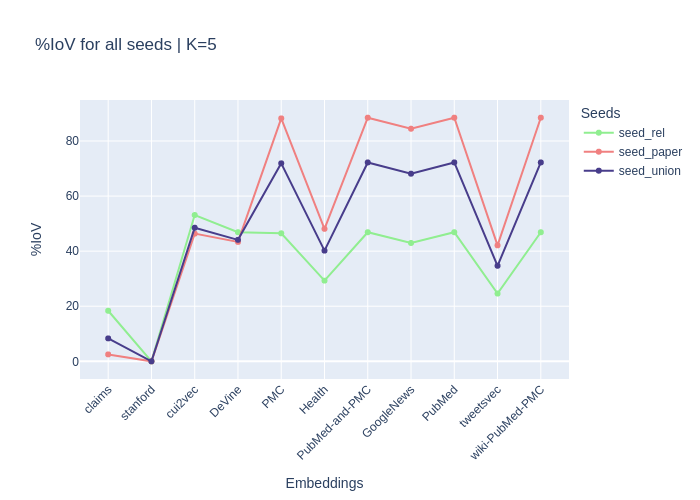

In [7]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Scatter(
        x=tmp,
        y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
        name=seed,
        marker_color=colors[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%IoV',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


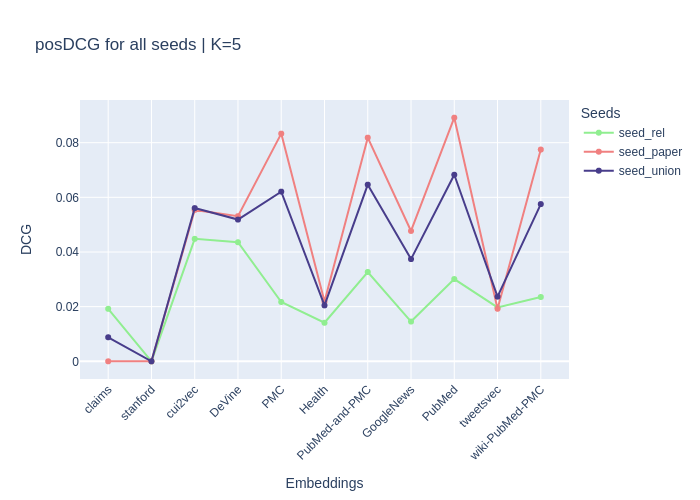

In [8]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Scatter(
        x=tmp,
        y=[big_g[emb][5][seed][0] for emb in embs],
        name=seed,
        marker_color=colors[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='DCG',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


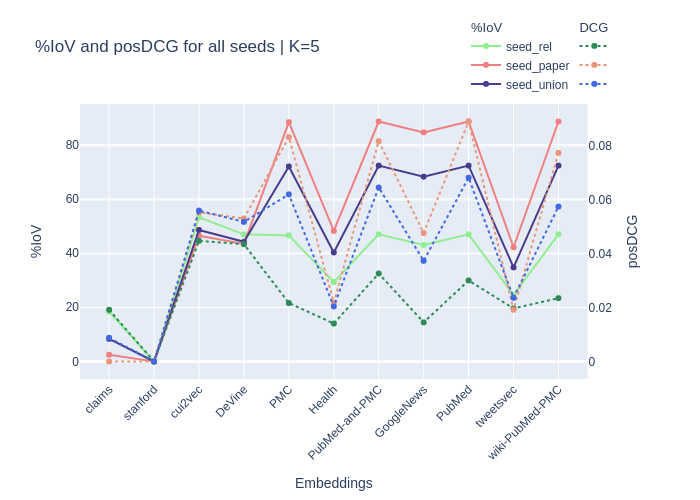

In [9]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%IoV"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="DCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%IoV',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%IoV", secondary_y=False)
fig.update_yaxes(title_text="posDCG", secondary_y=True)
fig.show(renderer="png")



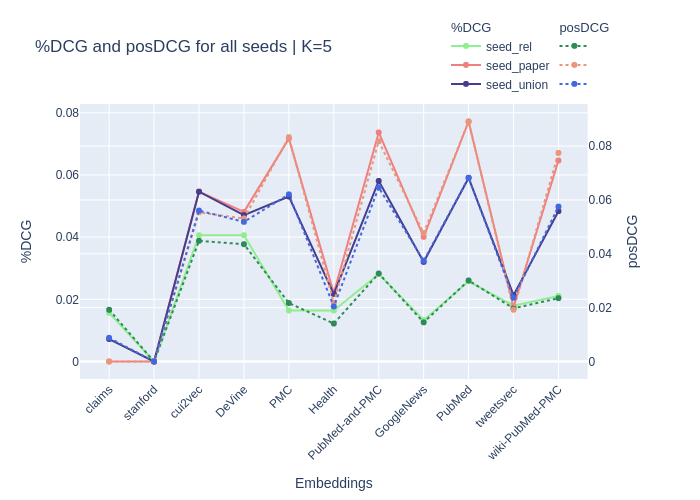

In [10]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%DCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="posDCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%DCG and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%DCG", secondary_y=False)
fig.update_yaxes(title_text="posDCG", secondary_y=True)
fig.show(renderer="png")



In [11]:
vemb_card = utils.inputs_load('Utilities/cardinality_vembs')

0:00:00


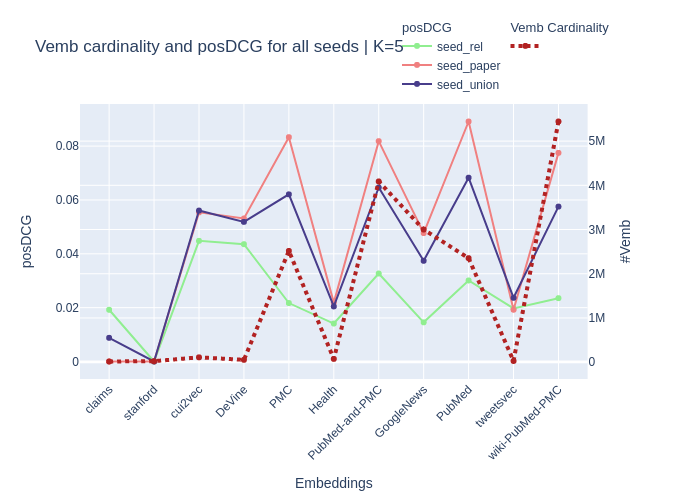

In [12]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="posDCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
fig.add_trace(go.Scatter(
    x=tmp,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text="Vemb Cardinality",
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='Vemb cardinality and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  #yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="posDCG", secondary_y=False)
fig.update_yaxes(title_text="#Vemb", secondary_y=True)
fig.show(renderer="png")



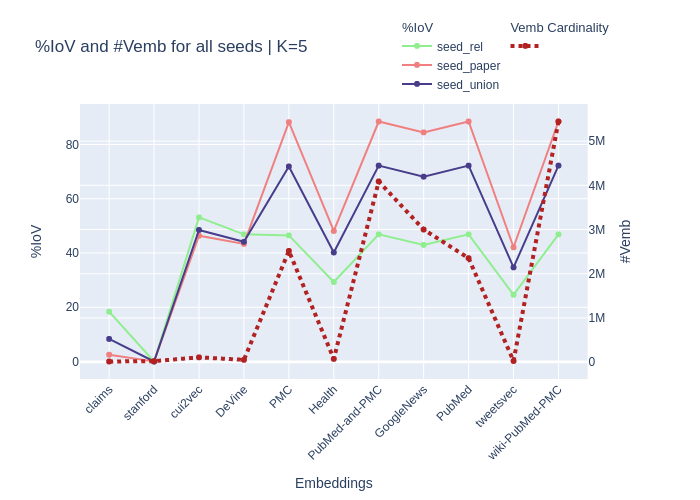

In [13]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%IoV"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=tmp,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
fig.add_trace(go.Scatter(
    x=tmp,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text="Vemb Cardinality",
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)     

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV and #Vemb for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  #yaxis_title='%IoV',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%IoV", secondary_y=False)
fig.update_yaxes(title_text="#Vemb", secondary_y=True)
fig.show(renderer="png")



In [14]:
tmp = utils.inputs_load('ANALOG_VARIABLE')

0:00:00


In [15]:
tmp

{'PMC-w2v': {'add': {'associated_finding_of': {'ratio': 0.0,
    'count': 0,
    '|K|(|K|-1)': 72,
    '|K|': 9,
    '|W|': 248},
   'associated_morphology_of': {'ratio': 3.618256689467427e-05,
    'count': 189,
    '|K|(|K|-1)': 9312,
    '|K|': 97,
    '|W|': 2286},
   'associated_with_malfunction_of_gene_product': {'ratio': 0.014204545454545456,
    'count': 15,
    '|K|(|K|-1)': 702,
    '|K|': 27,
    '|W|': 33},
   'clinical_course_of': {'ratio': 0.0,
    'count': 0,
    '|K|(|K|-1)': 4970,
    '|K|': 71,
    '|W|': 1903},
   'contraindicated_with_disease': {'ratio': 0.0005434534411106545,
    'count': 357,
    '|K|(|K|-1)': 53592,
    '|K|': 232,
    '|W|': 811},
   'course_of': {'ratio': 0.0001585367451489066,
    'count': 242,
    '|K|(|K|-1)': 4556,
    '|K|': 68,
    '|W|': 1236},
   'disease_has_associated_anatomic_site': {'ratio': 1.1412755105803262e-05,
    'count': 65,
    '|K|(|K|-1)': 6006,
    '|K|': 78,
    '|W|': 2387},
   'disease_has_associated_gene': {'ratio': 0.

In [24]:
embs

['claims_cuis_hs_300.txt',
 'stanford_cuis_svd_300.txt',
 'cui2vec_pretrained',
 'DeVine_etal_200',
 'PMC-w2v',
 'Health_2.5mreviews.s200.w10.n5.v15.cbow',
 'PubMed-and-PMC-w2v',
 'GoogleNews-vectors-negative300',
 'PubMed-w2v',
 'tweetsvec',
 'wikipedia-pubmed-and-PMC-w2v']

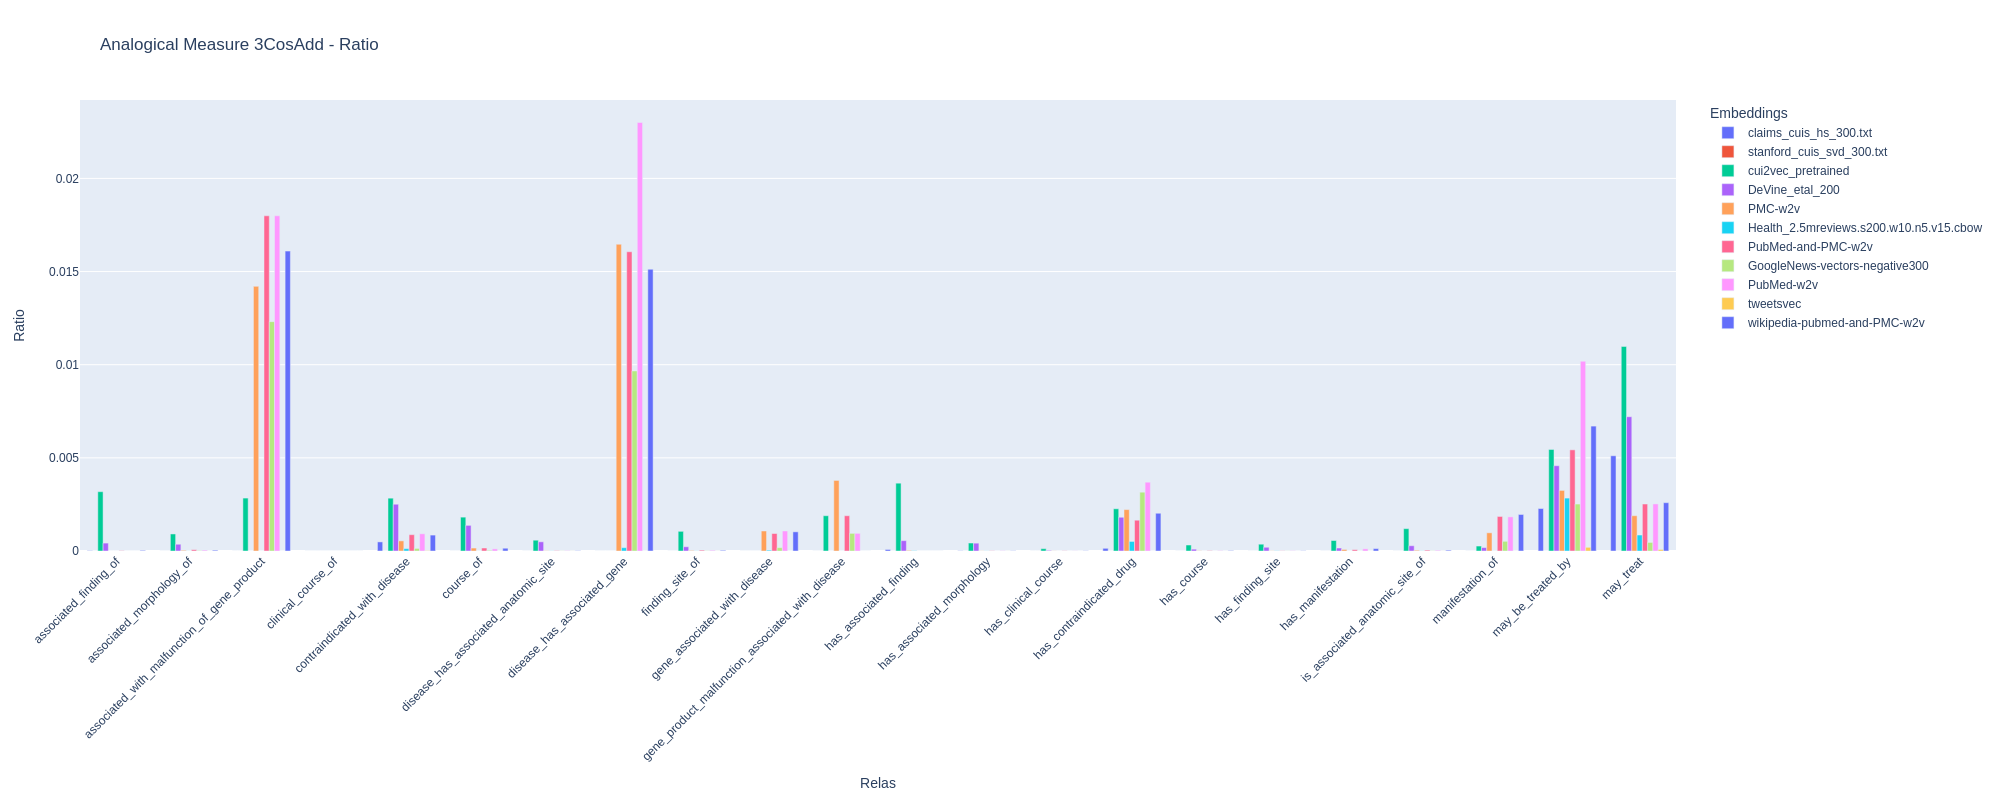

In [96]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=relas, y=[tmp[e]['add'][r]['ratio'] for r in relas])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

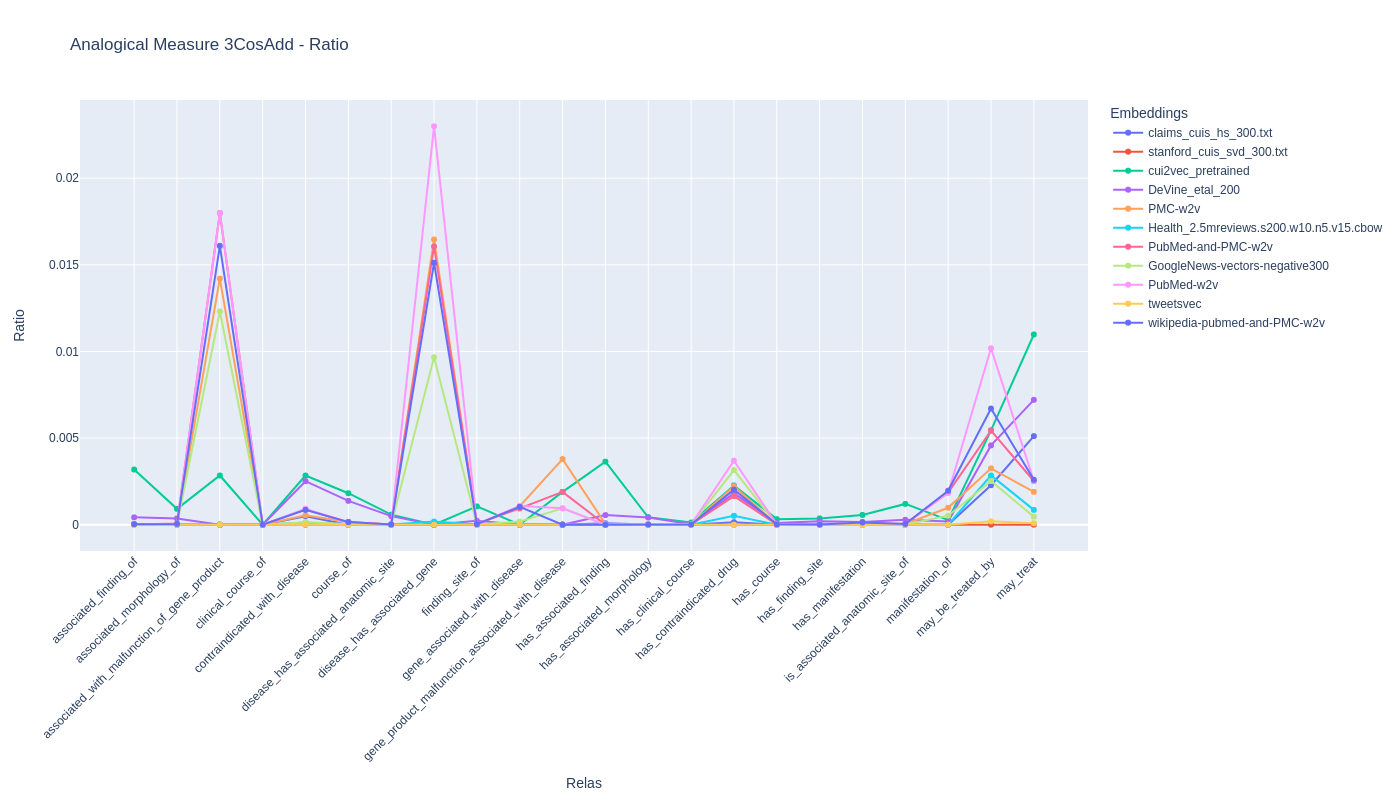

In [75]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=relas, y=[tmp[e]['add'][r]['ratio'] for r in relas], mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

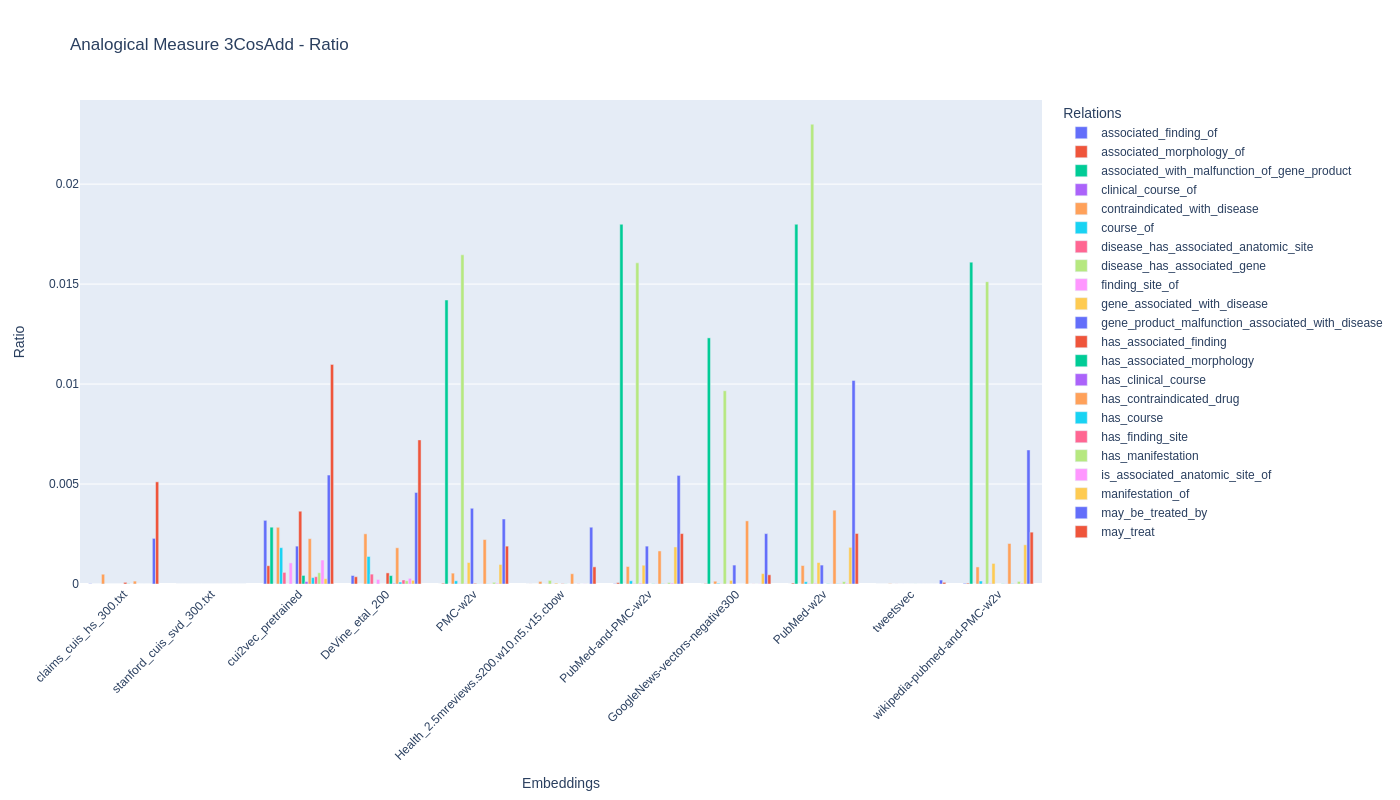

In [88]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in relas:
    fig.add_trace(go.Bar(name=r, x=embs, y=[tmp[e]['add'][r]['ratio'] for e in embs]))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

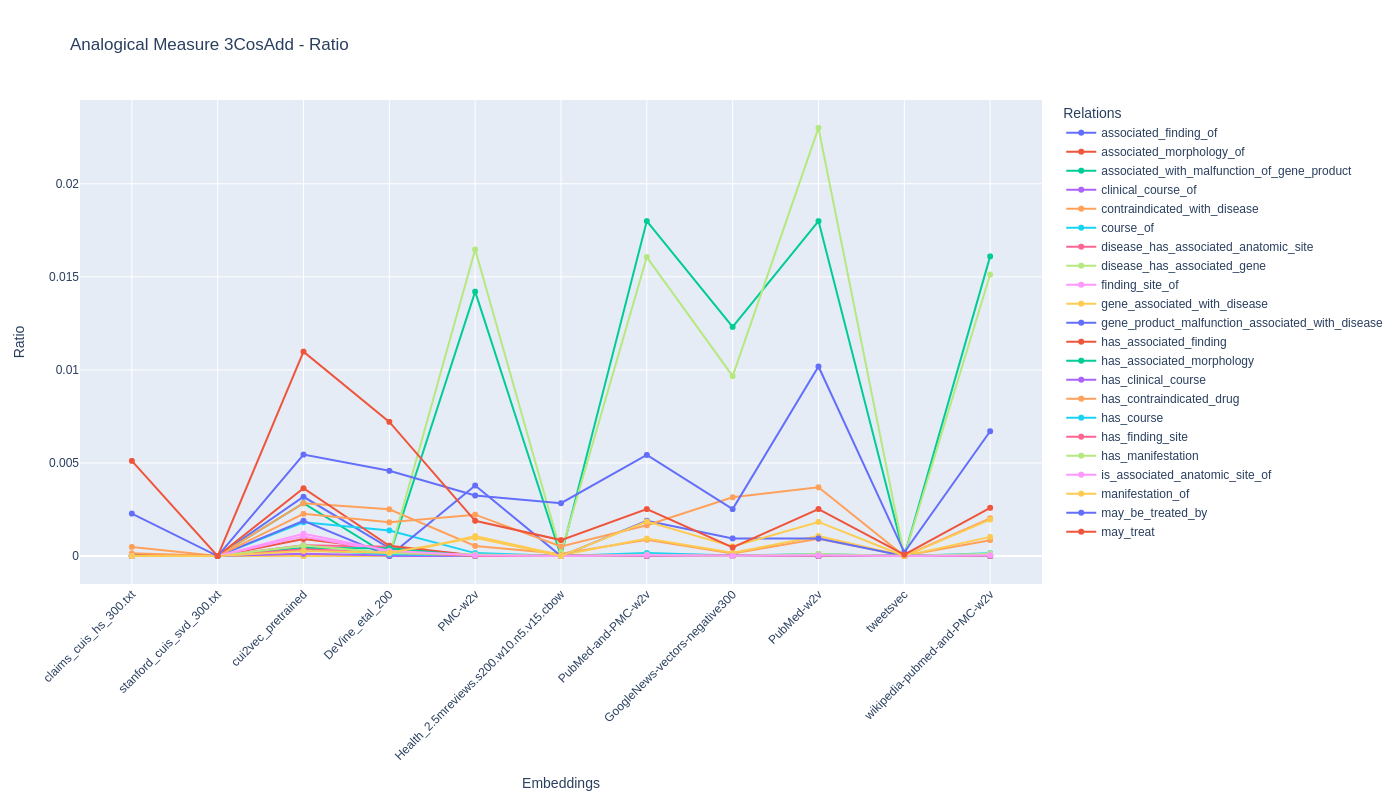

In [89]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in relas:
    fig.add_trace(go.Scatter(name=r, x=embs, y=[tmp[e]['add'][r]['ratio'] for e in embs], mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

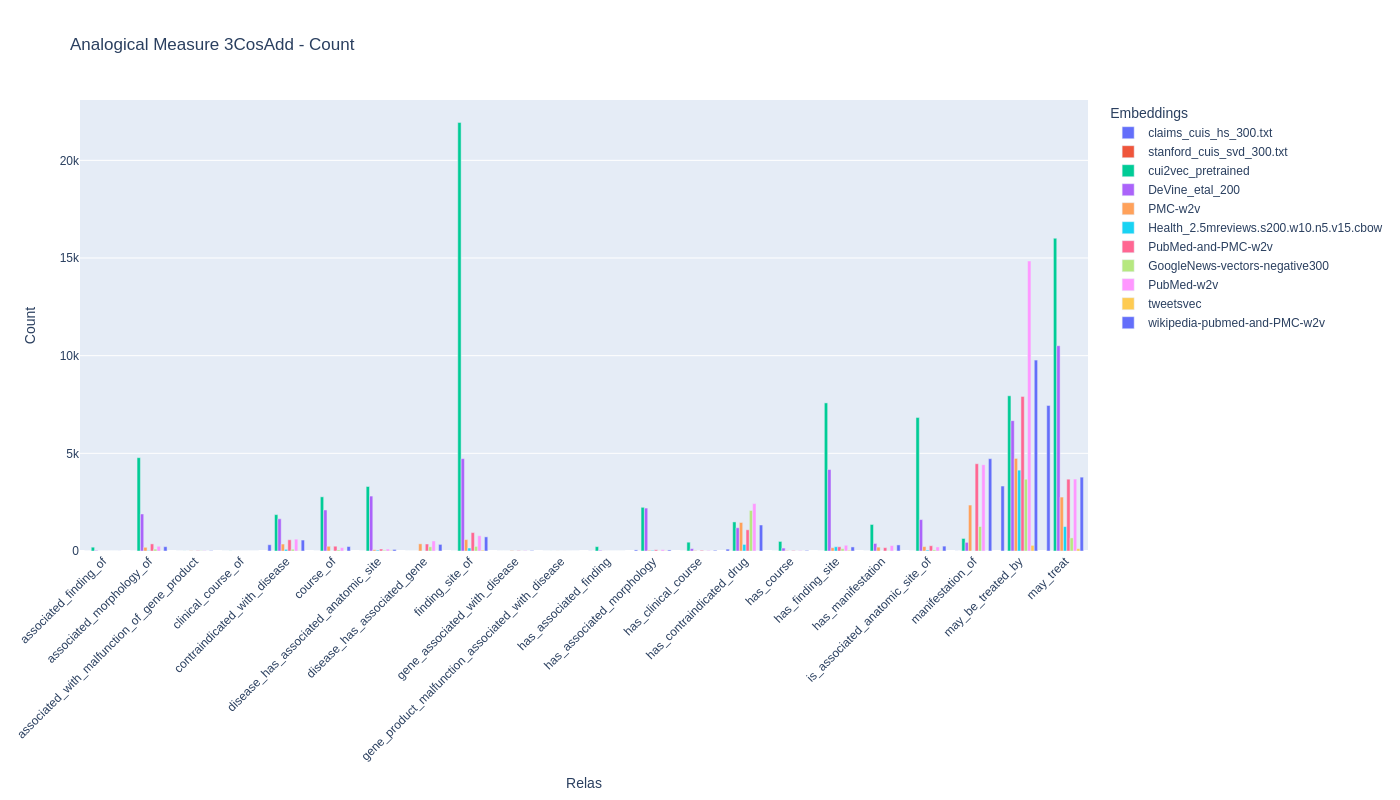

In [68]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=relas, y=[tmp[e]['add'][r]['count'] for r in relas])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

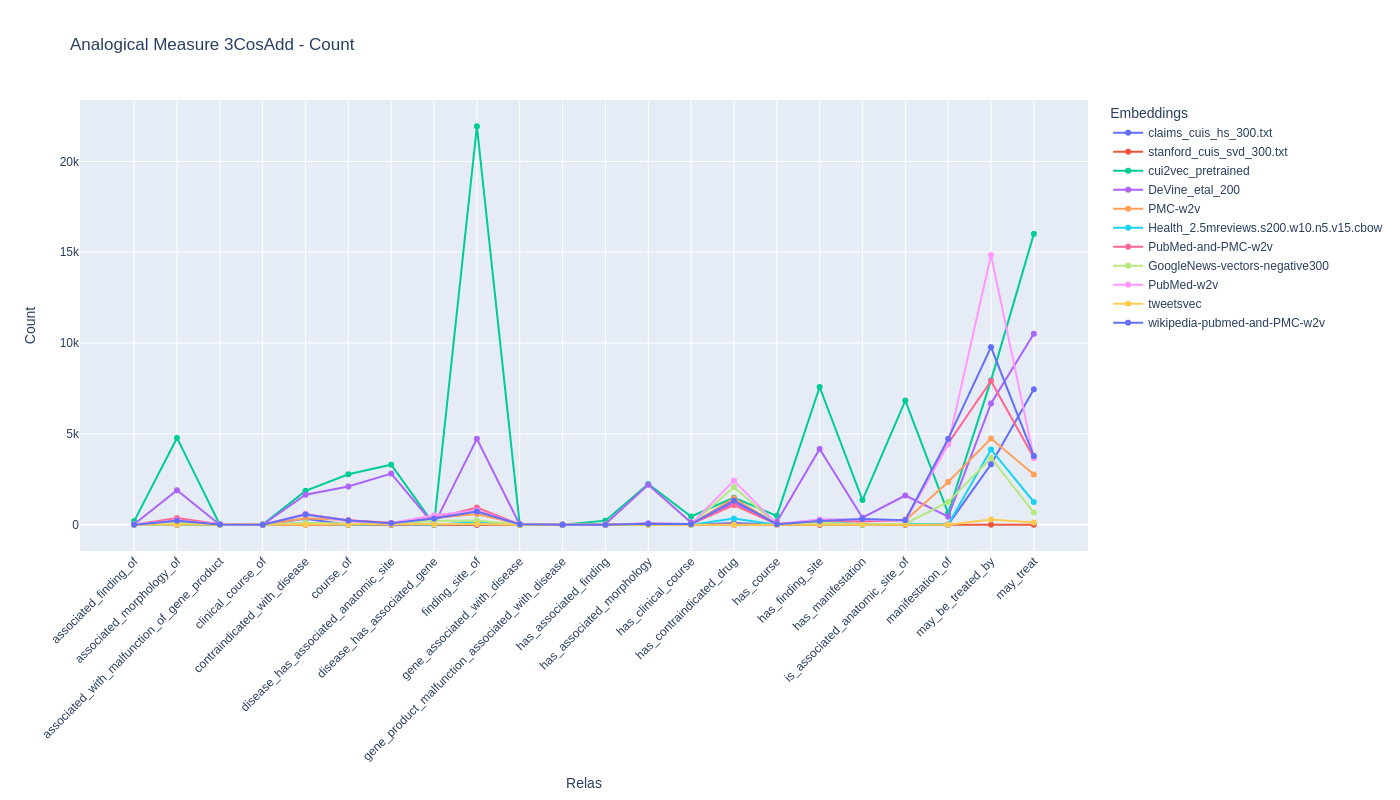

In [74]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=relas, y=[tmp[e]['add'][r]['count'] for r in relas], mode = 'lines+markers'
)) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

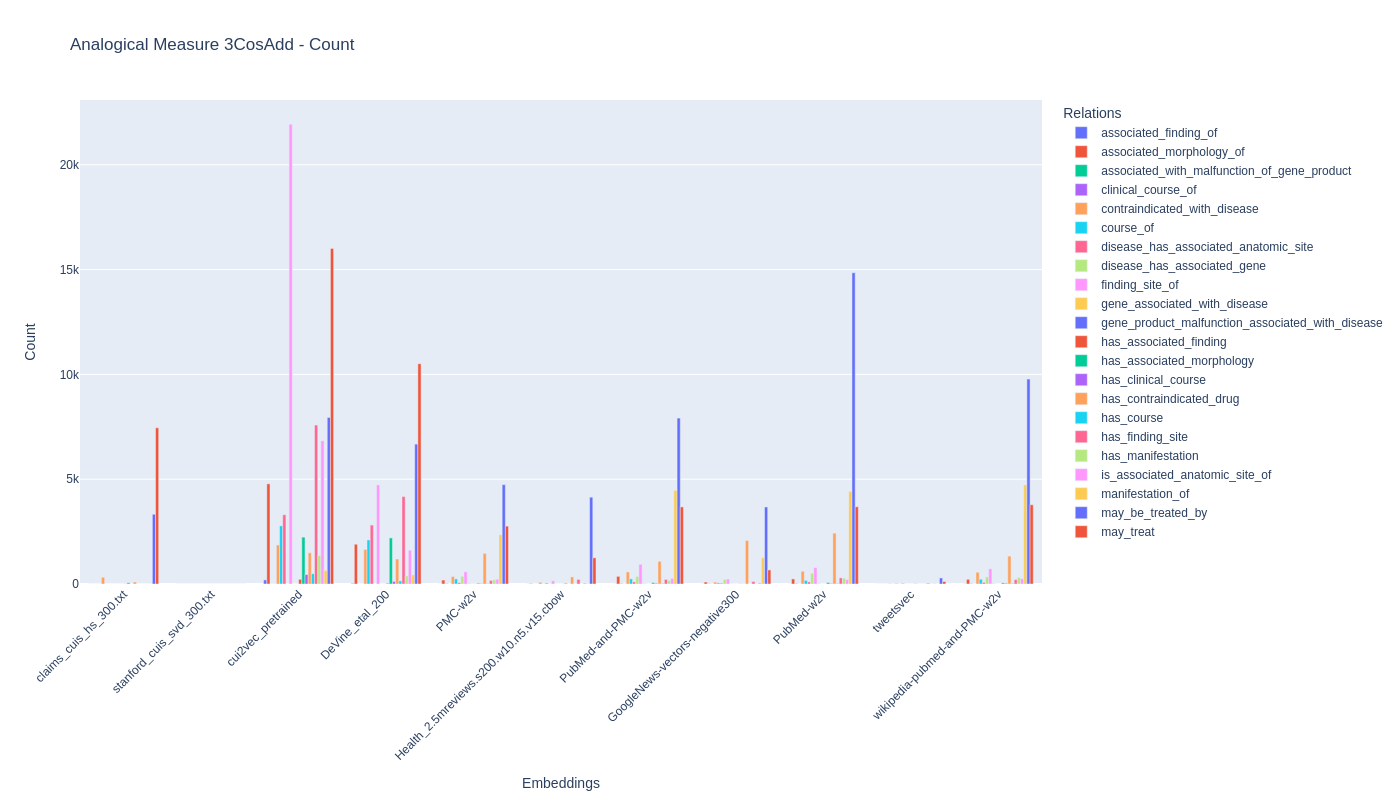

In [90]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in relas:
    fig.add_trace(go.Bar(name=r, x=embs, y=[tmp[e]['add'][r]['count'] for e in embs]))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

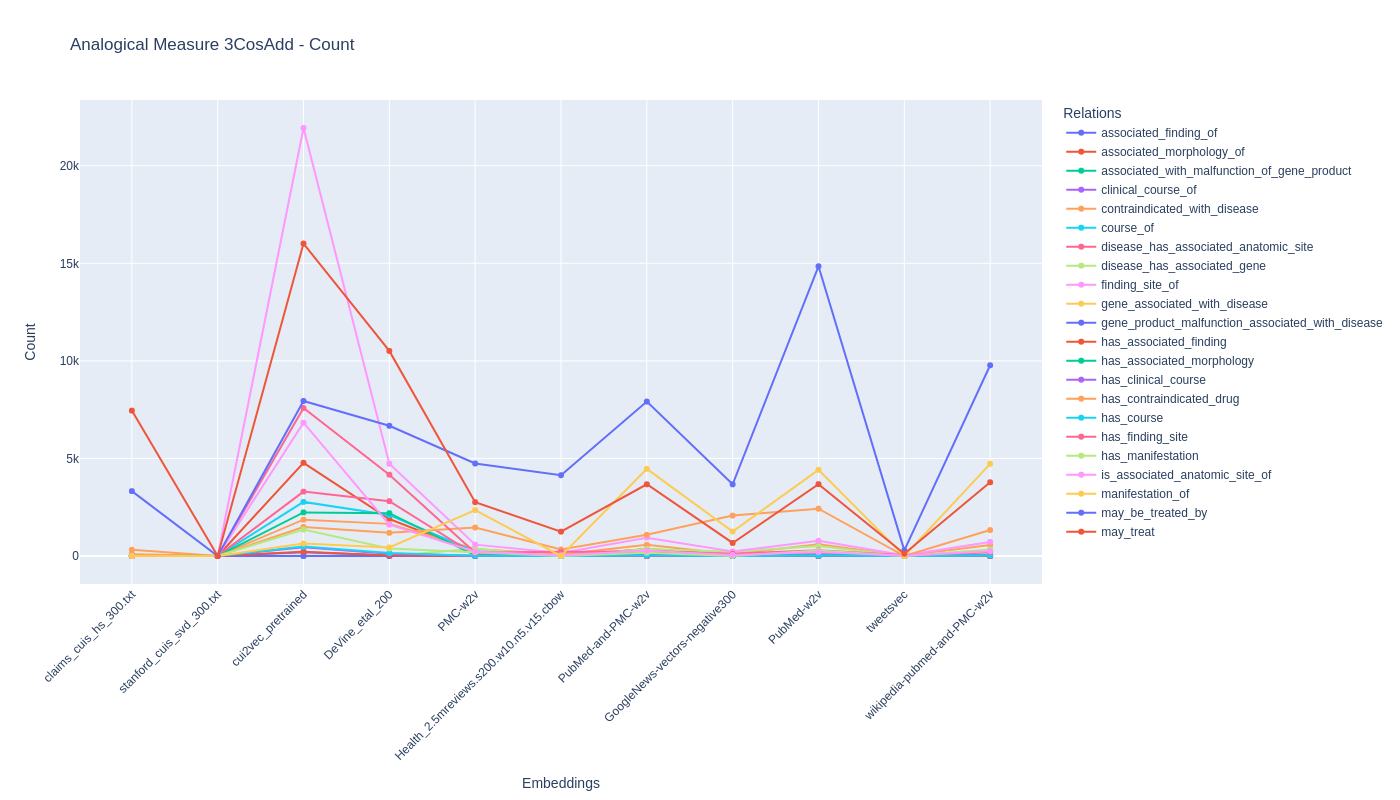

In [94]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in relas:
    fig.add_trace(go.Scatter(name=r, x=embs, y=[tmp[e]['add'][r]['count'] for e in embs]))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

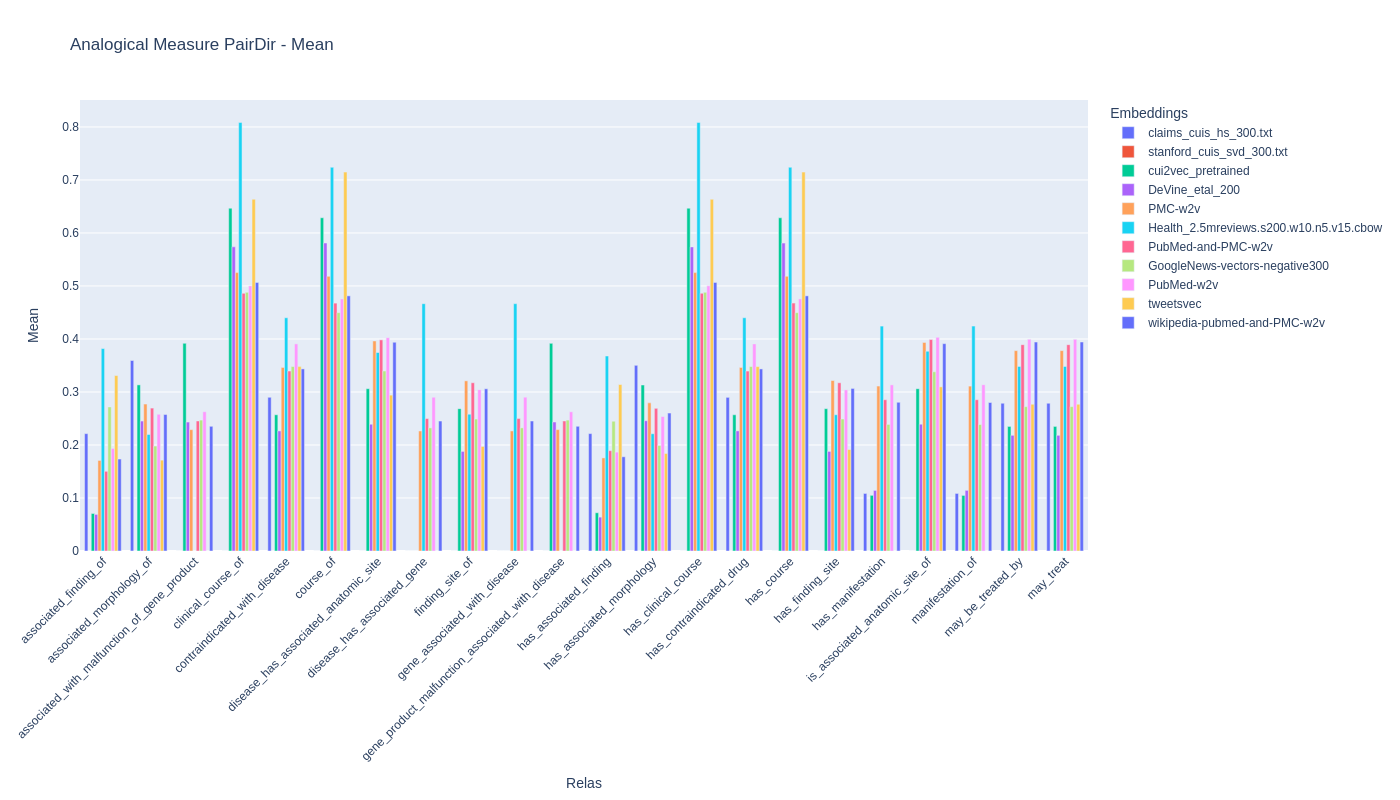

In [65]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=relas, y=[tmp[e]['pair'][r]['mean'] for r in relas])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure PairDir - Mean'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Mean"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

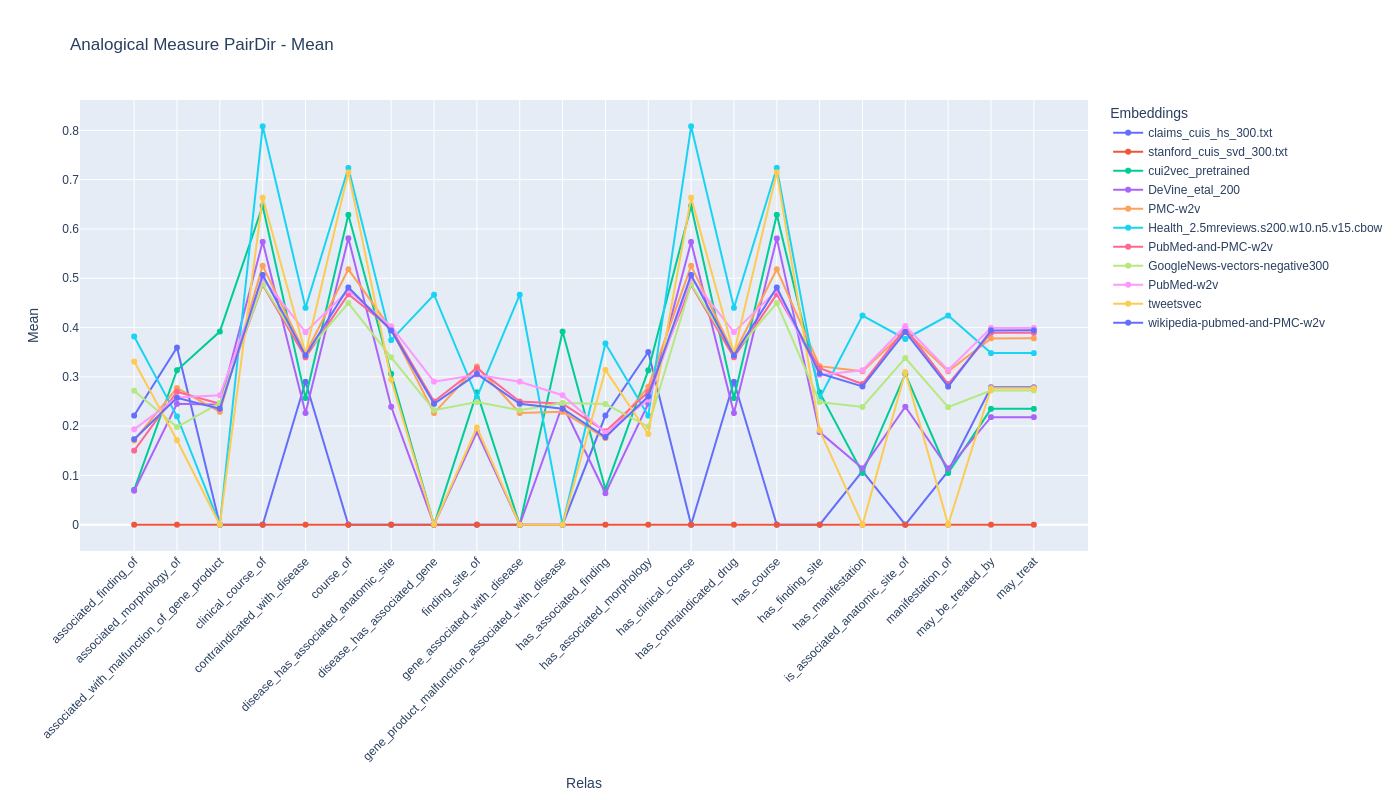

In [76]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=relas, y=[tmp[e]['pair'][r]['mean'] for r in relas], mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure PairDir - Mean'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Mean"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

In [77]:
card_k = utils.inputs_load('Utilities/AnalogicalData/k_cardinality_per_rel') 

0:00:00


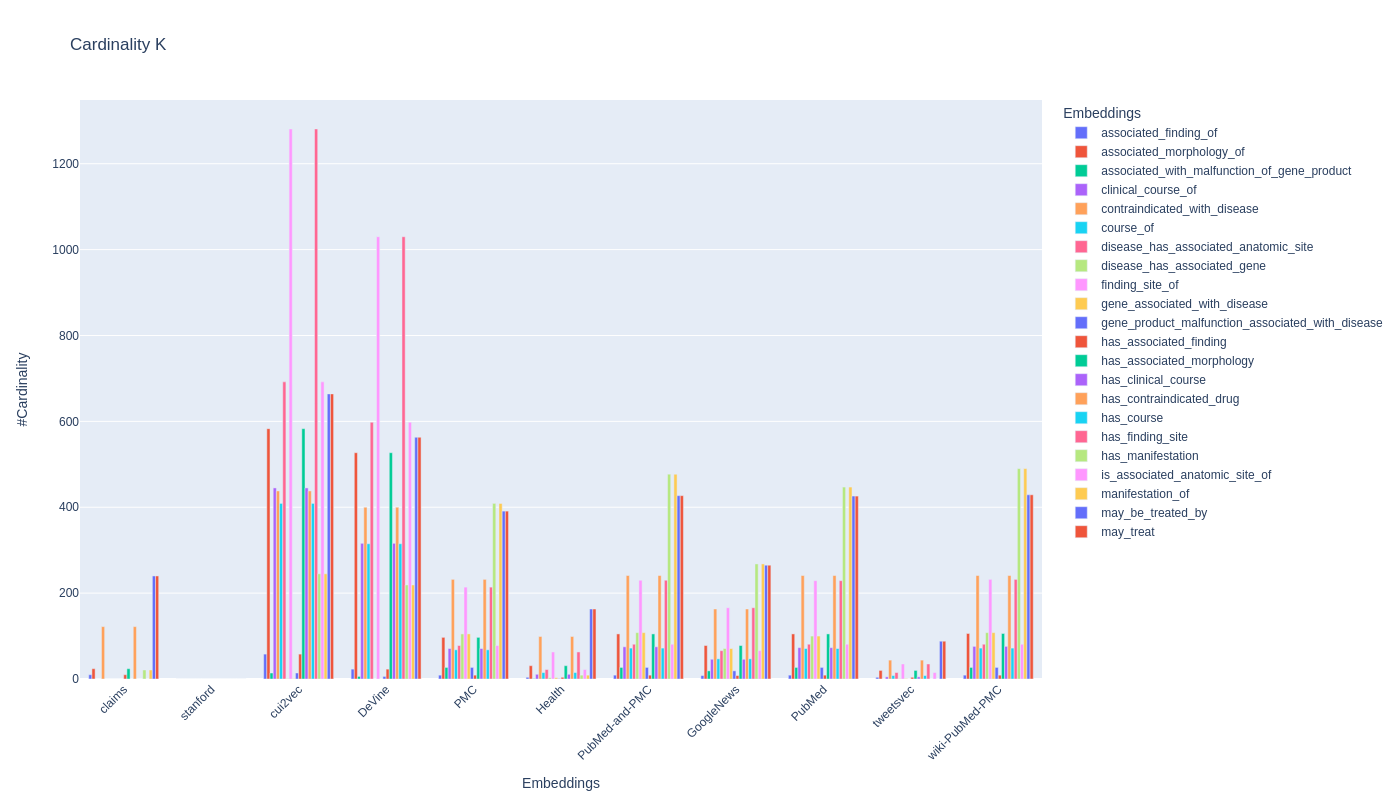

In [84]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in relas:
    fig.add_trace(go.Bar(name=r, x=embs_, y=[card_k[r][e] for e in embs])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Cardinality K'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="#Cardinality"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

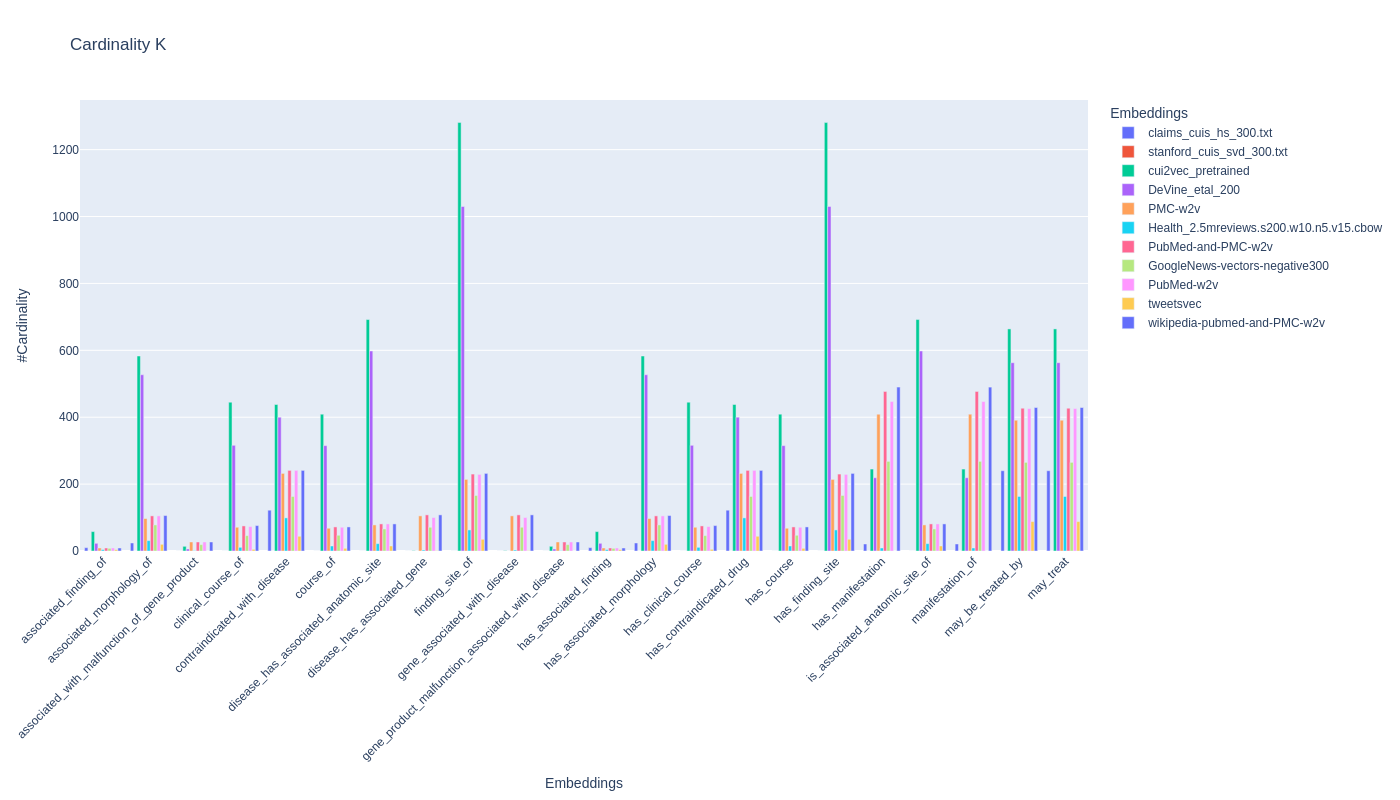

In [83]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=relas, y=[card_k[r][e] for r in relas])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Cardinality K'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="#Cardinality"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")